In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg
import numpy as np
import os

from src.funcs_3_1 import M_matrix_square, M_matrix_rectangle

save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)

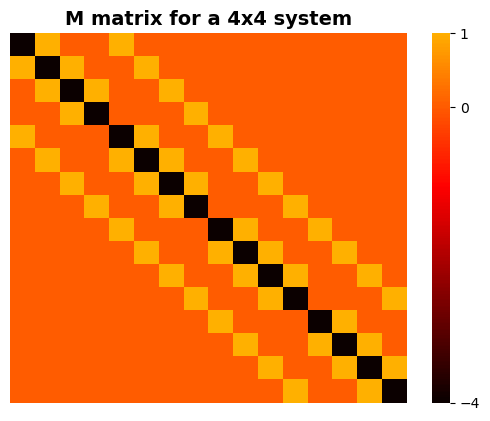

In [37]:
# Draw the M matrix for a 4x4 system

N = 4

sns.heatmap(M_matrix_square(N).toarray(), cmap='hot', center=0, cbar=True,
            xticklabels=False, yticklabels=False,
            cbar_kws={'ticks': [-4, 0, 1]})
save_path = os.path.join(save_folder, f'Question A.png')
plt.title('M matrix for a 4x4 system', fontweight='semibold', fontsize=14)
plt.savefig(save_path, dpi=300)
plt.show()


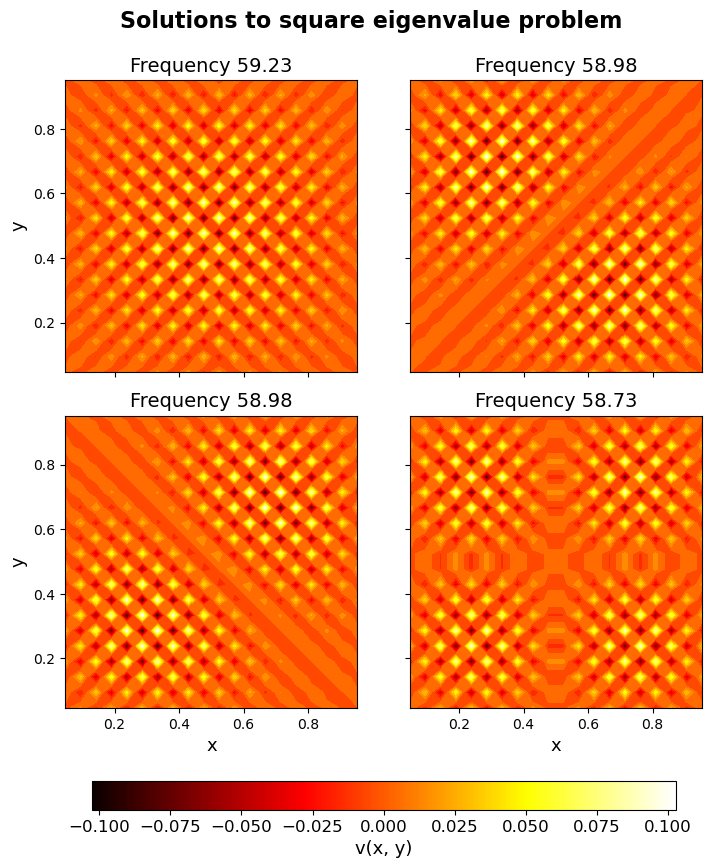

In [34]:
L = 1.0
N = 20
h = L / (N + 1)
M = M_matrix_square(N).toarray()

eigenvalues, eigenvectors = scipy.linalg.eigh(M)

idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

x = np.linspace(h, L-h, N)
y = np.linspace(h, L-h, N)
X, Y = np.meshgrid(x, y)

global_min = np.inf
global_max = -np.inf
for i in range(4):
    sol = eigenvectors[:, i].reshape(N, N)
    global_min = min(global_min, sol.min())
    global_max = max(global_max, sol.max())

norm = plt.Normalize(vmin=global_min, vmax=global_max)
cmap = 'hot'
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    sol = eigenvectors[:, i].reshape(N, N)
    freq = np.sqrt(-eigenvalues[i]) / h
    ax.contourf(X, Y, sol, N, cmap=cmap, norm=norm)
    ax.set_aspect('equal')
    ax.set_title(f'Frequency {freq:.2f}', fontsize=14)
    if i // 2 == 1:
        ax.set_xlabel('x', fontsize=13)
    else:
        ax.set_xticklabels([])
    if i % 2 == 0:
        ax.set_ylabel('y', fontsize=13)
    else:
        ax.set_yticklabels([])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.subplots_adjust(wspace=-0.2, hspace=0.15, bottom=0.15)
cbar = fig.colorbar(sm, ax=axes, orientation='horizontal', location='bottom', fraction=0.04, pad=0.1)
cbar.set_label('v(x, y)', fontsize=13)  # Larger colorbar label
cbar.ax.tick_params(labelsize=12)
fig.suptitle('Solutions to square eigenvalue problem', fontweight='semibold', fontsize=16, y=0.95)
plt.show()

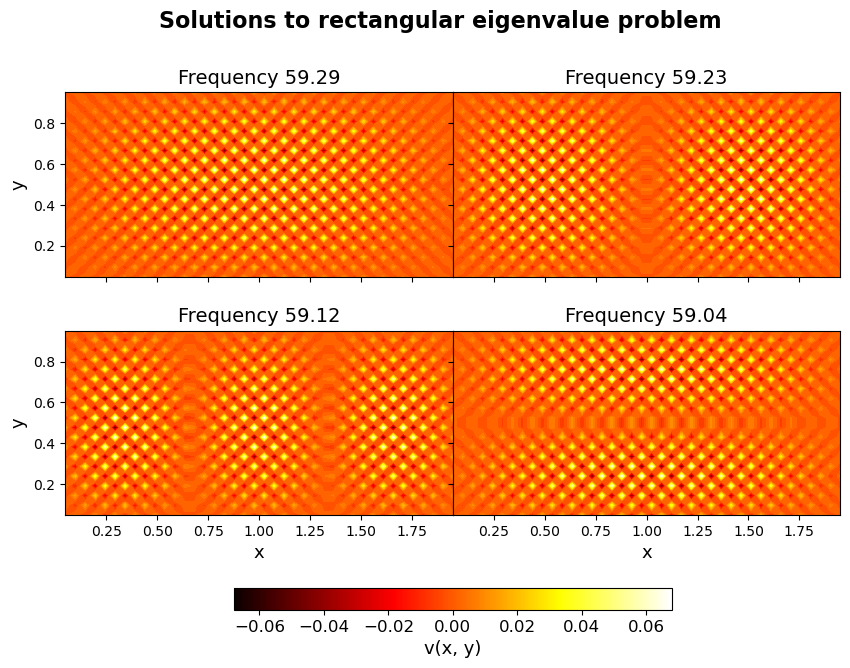

In [33]:
L = 1.0
Nx = 40
Ny = 20  # Half Nx to match the 2L domain
hx = (2 * L) / (Nx + 1)
hy = L / (Ny + 1)

M = M_matrix_rectangle(Nx, Ny).toarray()

eigenvalues, eigenvectors = scipy.linalg.eigh(M)
idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

x = np.linspace(hx, 2 * L - hx, Nx)
y = np.linspace(hy, L - hy, Ny)
X, Y = np.meshgrid(x, y)

global_min = np.inf
global_max = -np.inf
for i in range(4):
    sol = eigenvectors[:, i].reshape(Ny, Nx)
    global_min = min(global_min, sol.min())
    global_max = max(global_max, sol.max())

norm = plt.Normalize(vmin=global_min, vmax=global_max)
cmap = 'hot'
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    sol = eigenvectors[:, i].reshape(Ny, Nx)
    freq = np.sqrt(-eigenvalues[i]) / min(hx, hy)
    ax.contourf(X, Y, sol, Nx, cmap=cmap, norm=norm)
    ax.set_aspect('equal')
    ax.set_title(f'Frequency {freq:.2f}', fontsize=14)
    if i // 2 == 1:
        ax.set_xlabel('x', fontsize=13)
    else:
        ax.set_xticklabels([])
    if i % 2 == 0:
        ax.set_ylabel('y', fontsize=13)
    else:
        ax.set_yticklabels([])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.subplots_adjust(wspace=0, hspace=-0.4, bottom=0.15)
cbar = fig.colorbar(sm, ax=axes, orientation='horizontal', location='bottom', fraction=0.03, pad=0.1)
cbar.set_label('v(x, y)', fontsize=13)
cbar.ax.tick_params(labelsize=12)
fig.suptitle('Solutions to rectangular eigenvalue problem', fontweight='semibold', fontsize=16, y=0.75)
plt.show()